## L200921 Aisha Muhammad Nawaz 
## Digital Image Processing 
## Spring 2024 Assignment 3 BSCS 6B
##  Due: 28th April 2024 (Sunday)

#### Q: Furnish the following using appropriate GUI:
#### 1. Pseudomedian filter

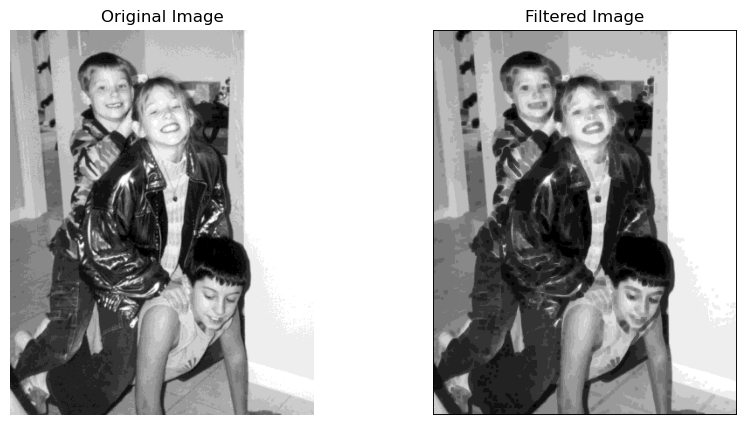

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pseudomedian_filter(img):
    filtered_img = np.zeros_like(img)

    # Apply pseudomedian filter to each channel of the image
    for i in range(3):  # Loop through RGB channels
        for y in range(1, img.shape[0] - 1):  # Exclude borders
            for x in range(1, img.shape[1] - 1):
                # Compute pseudomedian using the described logic
                min_max = min(img[y-1, x-1, i], img[y-1, x, i], img[y-1, x+1, i], 
                              img[y, x-1, i], img[y, x, i], img[y, x+1, i], 
                              img[y+1, x-1, i], img[y+1, x, i], img[y+1, x+1, i])
                filtered_img[y, x, i] = min_max
    return filtered_img

def applyPseudomedianFilter(img_path):
    img = cv2.imread(img_path)
    filtered_img = pseudomedian_filter(img)

    # Display original and filtered images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Filtered Image")
    plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Example usage:
img_path = 'image.png'
applyPseudomedianFilter(img_path)


#### 2. MMSE filter (with all possible Scenarios).

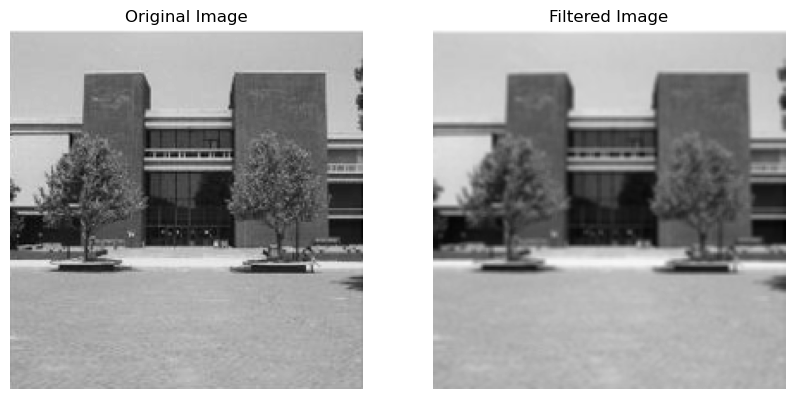

In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def mmse_filter(image, noise_variance, local_variance):
    # Compute MMSE filter
    filtered_image = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            local_var = local_variance[i, j]
            if local_var == 0:
                # No noise, return original image
                filtered_image[i, j] = pixel_value
            elif local_var <= noise_variance:
                # Noise variance dominates, mean filter
                filtered_image[i, j] = np.mean(image[max(0, i-1):min(image.shape[0], i+2), 
                                                       max(0, j-1):min(image.shape[1], j+2)])
            else:
                # Local variance dominates, return close to original
                filtered_image[i, j] = pixel_value
    
    return filtered_image.astype(np.uint8)

def apply_mmse_filter(image_path, noise_variance, local_variance):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply MMSE filter
    filtered_image = mmse_filter(image, noise_variance, local_variance)
    
    # Display original and filtered images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Filtered Image")
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage:
image_path = 'image2.png'
local_variance = np.random.rand(*cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).shape) * 20  # Example local variance
noise_variance = 600  # Example noise variance

apply_mmse_filter(image_path, noise_variance, local_variance)

# Scenario 1: 0 noise in image

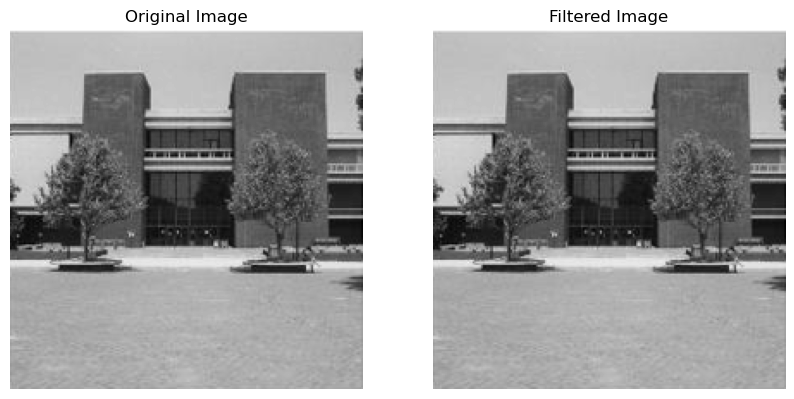

In [67]:
noise_variance_1 = 0
local_variance_1 = np.random.rand(*cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).shape) * 5  # Example local variance
apply_mmse_filter(image_path, noise_variance_1, local_variance_1)

# Scenario 2: Noise variance equals local variance (Mean filter)

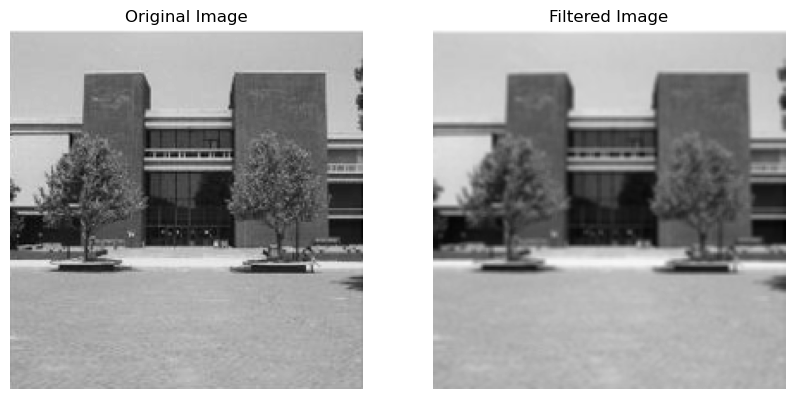

In [68]:
noise_variance_2 = 20
local_variance_2 = np.random.rand(*cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).shape) * 20  # Example local variance
apply_mmse_filter(image_path, noise_variance_2, local_variance_2)

# Scenario 3: Local variance greater than noise variance

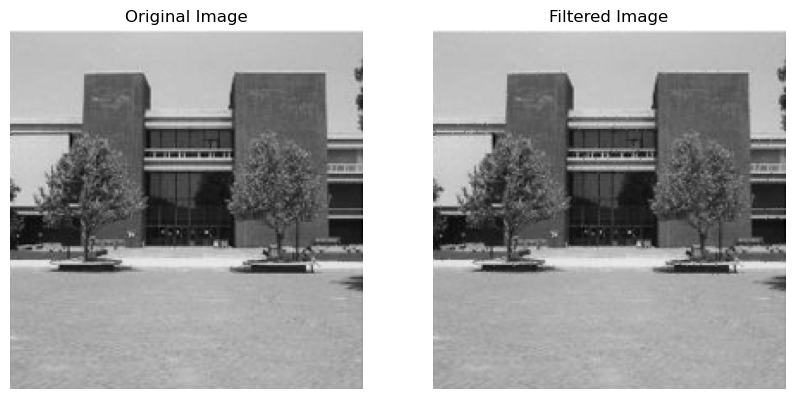

In [69]:
noise_variance_3 = 5
local_variance_3 = np.random.rand(*cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).shape) * 50  # Example local variance
apply_mmse_filter(image_path, noise_variance_3, local_variance_3)

# GUI

In [64]:
import tkinter as tk
from tkinter import filedialog, messagebox
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageTk

# Function to apply MMSE filter
def apply_mmse_filter(image_path, noise_variance, local_variance):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    filtered_image = mmse_filter(image, noise_variance, local_variance)
    display_images(image_path, filtered_image)

# Function to apply pseudomedian filter
def apply_pseudomedian_filter(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    filtered_image = pseudomedian_filter(image)
    display_images(image_path, filtered_image)

# Function to display original and filtered images
def display_images(original_image_path, filtered_image):
    # Original image
    original_image = Image.open(original_image_path)
    original_image = original_image.resize((300, 300), Image.LANCZOS)  # Use LANCZOS resampling method
    original_photo = ImageTk.PhotoImage(original_image)
    original_label.config(image=original_photo)
    original_label.image = original_photo

    # Filtered image
    filtered_image = Image.fromarray(filtered_image)
    filtered_image = filtered_image.resize((300, 300), Image.LANCZOS)  # Use LANCZOS resampling method
    filtered_photo = ImageTk.PhotoImage(filtered_image)
    filtered_label.config(image=filtered_photo)
    filtered_label.image = filtered_photo

    # Show "Go Back" button
    go_back_button.pack(padx=10, pady=5)

# Function to clear displayed images
def clear_images():
    original_label.config(image='')
    filtered_label.config(image='')
    go_back_button.pack_forget()  # Hide "Go Back" button

# GUI
def open_image():
    filename = filedialog.askopenfilename()
    if filename:
        image_path.set(filename)
        clear_images()

def apply_filters():
    path = image_path.get()
    if not path:
        messagebox.showerror("Error", "Please select an image first.")
        return
    
    # Get selected scenario for MMSE filter
    scenario_mmse = scenario_mmse_var.get()
    
    # Apply MMSE filter based on selected scenario
    if scenario_mmse == 1:
        noise_variance_mmse = 0
        local_variance_mmse = np.random.rand(*cv2.imread(path, cv2.IMREAD_GRAYSCALE).shape) * 5
        apply_mmse_filter(path, noise_variance_mmse, local_variance_mmse)
    elif scenario_mmse == 2:
        noise_variance_mmse = 20
        local_variance_mmse = np.random.rand(*cv2.imread(path, cv2.IMREAD_GRAYSCALE).shape) * 20
        apply_mmse_filter(path, noise_variance_mmse, local_variance_mmse)
    elif scenario_mmse == 3:
        noise_variance_mmse = 5
        local_variance_mmse = np.random.rand(*cv2.imread(path, cv2.IMREAD_GRAYSCALE).shape) * 50
        apply_mmse_filter(path, noise_variance_mmse, local_variance_mmse)

    # Check if pseudomedian filter should be applied
    if apply_pseudomedian_var.get() == 1:
        apply_pseudomedian_filter(path)

root = tk.Tk()
root.title("Image Filters")

image_path = tk.StringVar()

# MMSE Filter Section
mmse_frame = tk.LabelFrame(root, text="MMSE Filter")
mmse_frame.pack(padx=10, pady=5, fill=tk.BOTH)

scenario_mmse_var = tk.IntVar()
tk.Radiobutton(mmse_frame, text="No noise in the image", variable=scenario_mmse_var, value=1).pack(anchor=tk.W)
tk.Radiobutton(mmse_frame, text="Noise variance equals local variance", variable=scenario_mmse_var, value=2).pack(anchor=tk.W)
tk.Radiobutton(mmse_frame, text="Local variance dominates over noise variance", variable=scenario_mmse_var, value=3).pack(anchor=tk.W)

# Pseudomedian Filter Section
pseudomedian_frame = tk.LabelFrame(root, text="Pseudomedian Filter")
pseudomedian_frame.pack(padx=10, pady=5, fill=tk.BOTH)

apply_pseudomedian_var = tk.IntVar()
tk.Checkbutton(pseudomedian_frame, text="Apply Pseudomedian Filter", variable=apply_pseudomedian_var).pack(anchor=tk.W)

# Original Image Label
original_label = tk.Label(root, text="Original Image")
original_label.pack(padx=10, pady=5, fill=tk.BOTH, expand=True)

# Filtered Image Label
filtered_label = tk.Label(root, text="Filtered Image")
filtered_label.pack(padx=10, pady=5, fill=tk.BOTH, expand=True)

# "Go Back" Button
go_back_button = tk.Button(root, text="Go Back", command=clear_images)

# Buttons
tk.Button(root, text="Open Image", command=open_image).pack(padx=10, pady=5)
tk.Button(root, text="Apply Filters", command=apply_filters).pack(padx=10, pady=5)
tk.Button(root, text="Go Back", command=clear_images).pack(padx=10, pady=5)

root.mainloop()
